# Data Preparation - LMA Features Data

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from collections import Counter
import numpy as np

### Load Dataset

In [31]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA_NEUTRAL.csv')
data = pd.read_csv('datasets/pa/DANCE_DATA.csv')

In [32]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038,-0.5,0.6
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051,-0.5,0.6
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077,-0.5,0.6
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076,-0.5,0.6
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077,-0.5,0.6


## Feature Selection

In [33]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA_NEUTRAL.csv')
data = pd.read_csv('datasets/pa/DANCE_DATA.csv')

In [34]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,-0.002192,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,0.003267,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003954,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.001754,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.000286,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077


### Variance Analysis

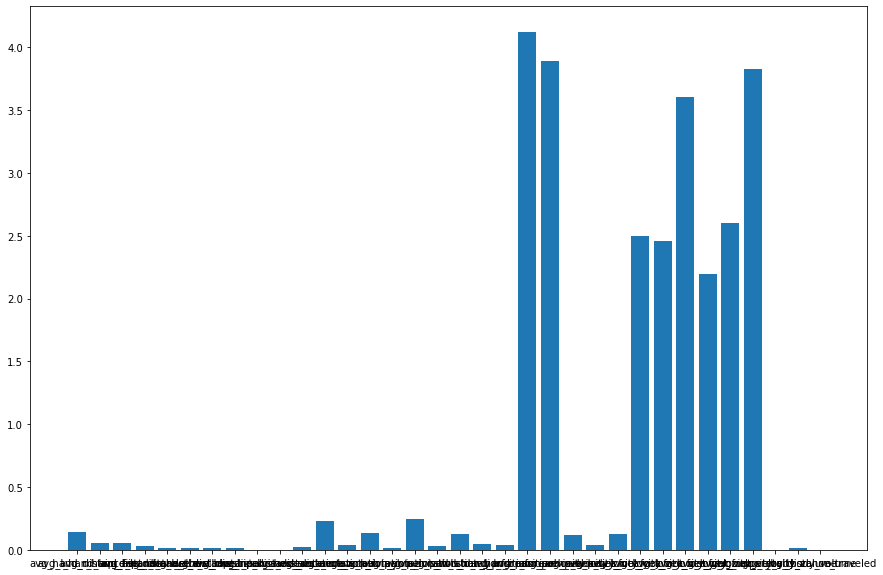

avg_hand_distance  -  0.14297125088005386
avg_l_hand_hip_distance  -  0.053462198659925096
avg_r_hand_hip_distance  -  0.051860929070843505
avg_feet_distance  -  0.033222654054804616
avg_l_hand_chest_distance  -  0.01839366520445351
avg_r_hand_chest_distance  -  0.018432583672795266
avg_l_elbow_hip_distance  -  0.012880440568140432
avg_r_elbow_hip_distance  -  0.012417905814288822
avg_chest_pelvis_distance  -  1.248532467992457e-18
avg_neck_chest_distance  -  2.4995252203146232e-05
avg_neck_rotation_w  -  0.024784136747146964
avg_neck_rotation_x  -  0.23004153982567904
avg_neck_rotation_y  -  0.03832817334587057
avg_neck_rotation_z  -  0.13280600580989593
avg_pelvis_rotation_w  -  0.017114694761455062
avg_pelvis_rotation_x  -  0.2438523479826954
avg_pelvis_rotation_y  -  0.027495480669030927
avg_pelvis_rotation_z  -  0.12662209007197422
std_l_hand_position  -  0.04473119568474417
std_r_hand_position  -  0.04215988685794885
avg_l_forearm_velocity  -  4.119797446678085
avg_r_forearm_velo

In [35]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [36]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')
#data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA_NEUTRAL.csv')
data = pd.read_csv('datasets/pa/DANCE_DATA.csv')

In [37]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,-0.002192,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,0.003267,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003954,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.001754,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.000286,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077


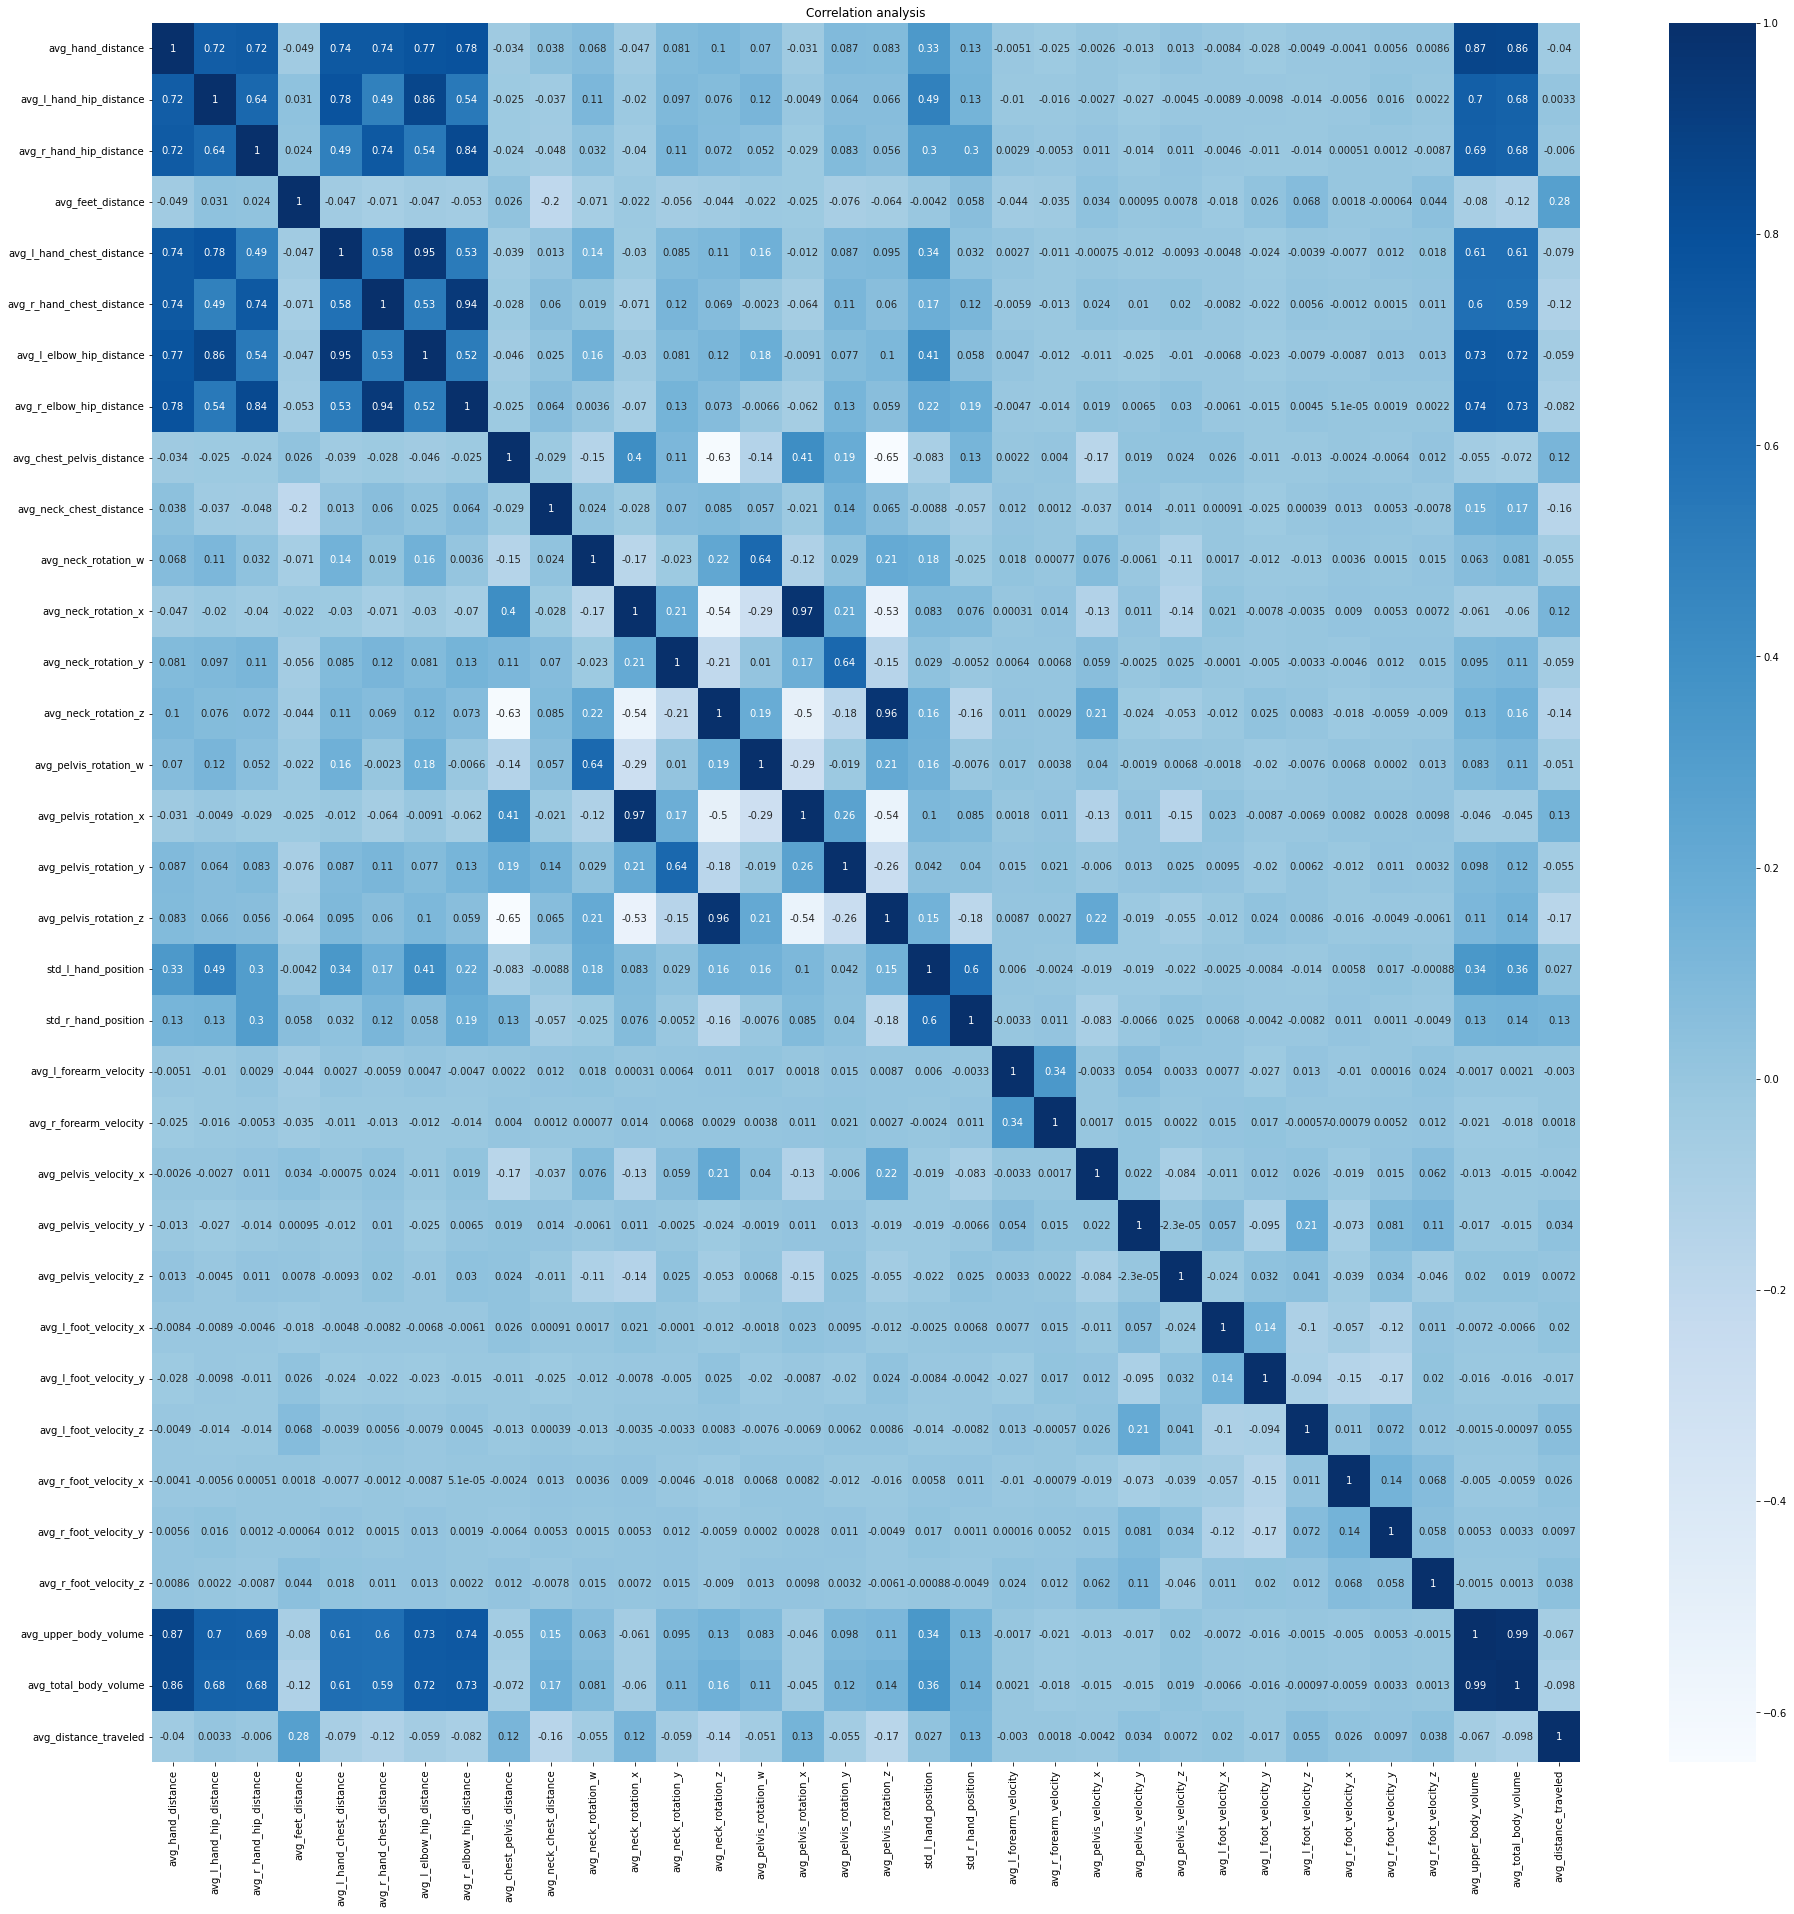

In [38]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [39]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['avg_pelvis_rotation_x', 'avg_pelvis_rotation_z', 'avg_total_body_volume']


In [40]:
X = X.drop(columns=['avg_total_body_volume'])
#X = X.drop(columns=['avg_pelvis_rotation_x', 'avg_pelvis_rotation_z', 'std_r_hand_position', 'avg_total_body_volume'])

In [41]:
#Store

fullData = X.join(y, how='right')
#fullData.to_csv(r'datasets/pa/Fs_LMA_DATA.csv', index = False)
#fullData.to_csv(r'datasets/pa/Fs_LMA_DATA_EXTRA.csv', index = False)
#fullData.to_csv(r'datasets/pa/Fs2_LMA_DATA_EXTRA.csv', index = False)

#fullData.to_csv(r'datasets/pa/Fs_LMA_DATA_EXTRA_NEUTRAL.csv', index = False)
fullData.to_csv(r'datasets/pa/Fs_DANCE_DATA.csv', index = False)

In [42]:
#data = pd.read_csv('datasets/pa/Fs_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs2_LMA_DATA_EXTRA.csv')

#data = pd.read_csv('datasets/pa/Fs_LMA_DATA_EXTRA_NEUTRAL.csv')
data = pd.read_csv('datasets/pa/Fs_DANCE_DATA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.000038,-0.5,0.6
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.000051,-0.5,0.6
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.000077,-0.5,0.6
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.000076,-0.5,0.6
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.000077,-0.5,0.6


## Data Balancing

In [43]:
data = pd.read_csv('datasets/label/DANCE_DATA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038,angry
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051,angry
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077,angry
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076,angry
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077,angry


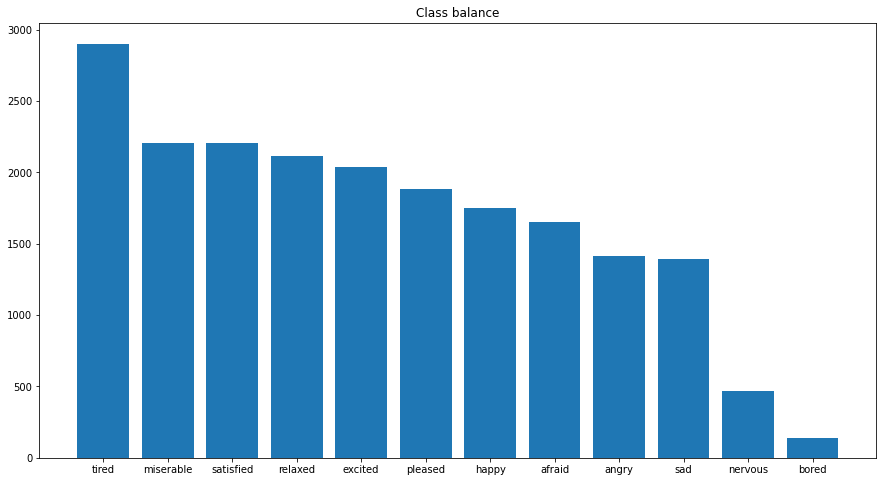

Minority class: 142
Majority class: 2209
Proportion: 0.06 : 1.0


In [44]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=1411 (6.994%)
Class=pleased, n=1881 (9.323%)
Class=afraid, n=1653 (8.193%)
Class=bored, n=142 (0.704%)
Class=tired, n=2903 (14.389%)
Class=happy, n=1750 (8.674%)
Class=excited, n=2038 (10.102%)
Class=sad, n=1396 (6.919%)
Class=miserable, n=2209 (10.949%)
Class=satisfied, n=2209 (10.949%)
Class=relaxed, n=2115 (10.483%)
Class=nervous, n=468 (2.320%)


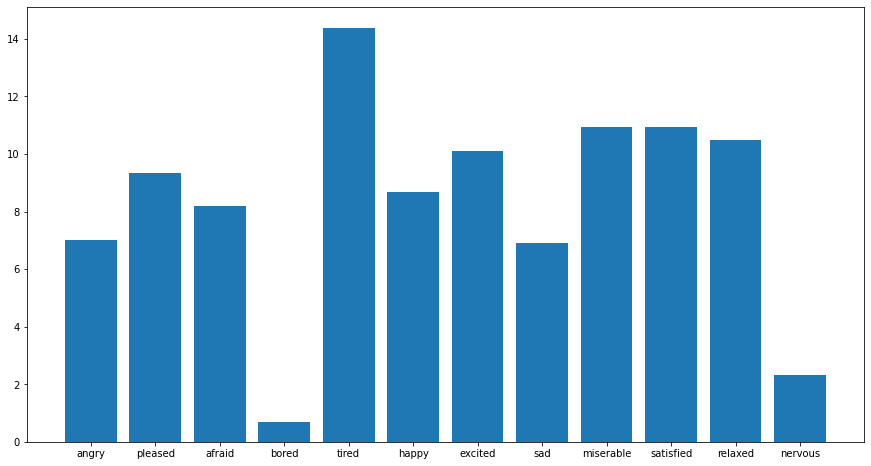

In [45]:
data = pd.read_csv('datasets/label/DANCE_DATA.csv')
values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (4.957%)
Class=angry, n=1000 (4.957%)
Class=bored, n=142 (0.704%)
Class=excited, n=1000 (4.957%)
Class=happy, n=1000 (4.957%)
Class=miserable, n=1000 (4.957%)
Class=nervous, n=468 (2.320%)
Class=pleased, n=1000 (4.957%)
Class=relaxed, n=1000 (4.957%)
Class=sad, n=1000 (4.957%)
Class=satisfied, n=1000 (4.957%)
Class=tired, n=1000 (4.957%)


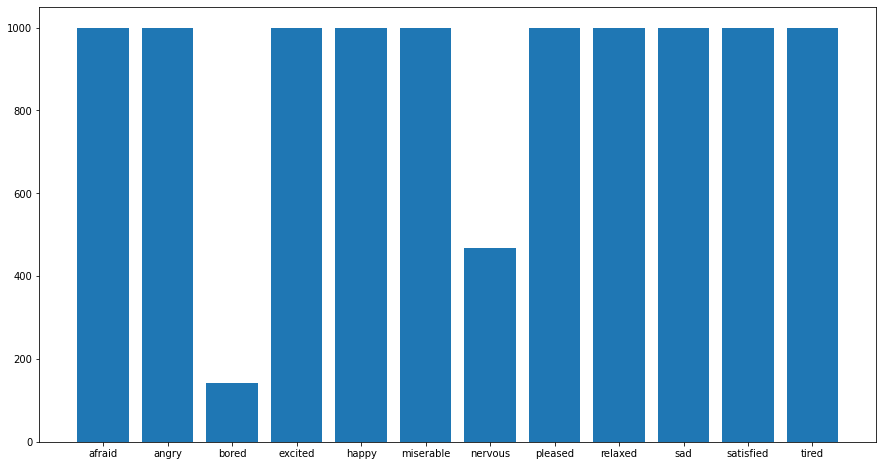

In [47]:
#strategy = {"angry":2000, "happy": 2000, "sad": 2000, "disgusted": 2000, "afraid": 2000, "pleased": 1881, "bored": 142, "tired": 2000, "relaxed": 2000, "excited": 2000, "miserable": 2000, "satisfied": 2000, "nervous": 468}
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 1000, "bored": 142, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 468}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=1000 (8.333%)
Class=angry, n=1000 (8.333%)
Class=bored, n=1000 (8.333%)
Class=excited, n=1000 (8.333%)
Class=happy, n=1000 (8.333%)
Class=miserable, n=1000 (8.333%)
Class=nervous, n=1000 (8.333%)
Class=pleased, n=1000 (8.333%)
Class=relaxed, n=1000 (8.333%)
Class=sad, n=1000 (8.333%)
Class=satisfied, n=1000 (8.333%)
Class=tired, n=1000 (8.333%)


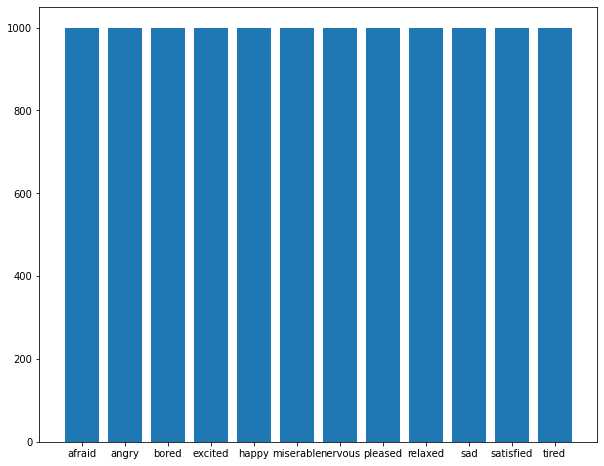

In [48]:
#strategy = {"angry":1000, "happy": 1000, "sad": 1000, "disgusted": 1000, "afraid": 1000, "neutral": 1000, "pleased": 1000, "bored": 1000, "tired": 1000, "relaxed": 1000, "excited": 1000}
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 1000, "bored": 1000, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 1000}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [49]:
conv_dict = {
    "angry": (-0.5, 0.6),
    "happy": (0.6, 0.5),
    "sad": (-0.6, -0.3),
    "disgusted": (-0.4, 0.25) ,
    "afraid": (-0.35, 0.7),
    "neutral": (0.0, 0.0), #note: may be worth removing neutral as it may be messing up the regressions
    "pleased": (0.7, 0.2),
    "bored": (-0.5, -0.7),
    "tired": (0.1, -0.7),
    "relaxed": (0.6, -0.55),
    "excited": (0.5, 0.7),
    
    "miserable": (-0.85, -0.1),
    "nervous": (-0.3, -0.66),
    "satisfied": (0.9, -0.25),
    
}

In [50]:
header = ["avg_hand_distance", "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance", "avg_feet_distance",
          "avg_l_hand_chest_distance", "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance", "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance", "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x","avg_neck_rotation_y", "avg_neck_rotation_z", 
          "avg_pelvis_rotation_w", "avg_pelvis_rotation_x", "avg_pelvis_rotation_y", "avg_pelvis_rotation_z",
          "std_l_hand_position", "std_r_hand_position",
          "avg_l_forearm_velocity", "avg_r_forearm_velocity",
          "avg_pelvis_velocity_x", "avg_pelvis_velocity_y", "avg_pelvis_velocity_z", 
          "avg_l_foot_velocity_x", "avg_l_foot_velocity_y", "avg_l_foot_velocity_z",
          "avg_r_foot_velocity_x", "avg_r_foot_velocity_y", "avg_r_foot_velocity_z", 
          "avg_upper_body_volume",
          #"avg_total_body_volume", 
          "avg_distance_traveled",
          "EMOTION_P", "EMOTION_A"
         ]

total_volume_index = data.columns.get_loc("avg_total_body_volume")

with open('datasets/pa/Fs_B_DANCE_DATA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j == total_volume_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])

        writer.writerow(new_row)

In [51]:
data = pd.read_csv('datasets/pa/Fs_B_DANCE_DATA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,1.302361,0.807491,0.758619,0.176057,0.713210,0.674352,0.577742,0.548182,0.286151,0.278592,...,0.002750,-0.011737,-0.001815,0.000087,-0.015623,-0.001321,0.071543,0.000046,-0.35,0.7
1,1.311204,0.805537,0.762331,0.186022,0.712945,0.677321,0.577609,0.551106,0.286151,0.278439,...,0.004337,0.005181,-0.008428,0.004981,-0.006614,0.000639,0.072116,0.000073,-0.35,0.7
2,1.311808,0.809678,0.760055,0.186038,0.714290,0.676760,0.578817,0.550576,0.286151,0.278425,...,0.019304,-0.001355,0.003903,0.009209,-0.003092,0.011939,0.072143,0.000068,-0.35,0.7
3,1.307124,0.809490,0.755595,0.187074,0.713639,0.674817,0.578196,0.548889,0.286151,0.278428,...,-0.024717,-0.001418,0.006166,0.000985,0.003851,-0.000603,0.071900,0.000047,-0.35,0.7
4,1.310825,0.803067,0.763555,0.181575,0.712145,0.677610,0.576914,0.551341,0.286151,0.278445,...,-0.014621,-0.004035,-0.007761,-0.001498,-0.002858,-0.009407,0.072094,0.000058,-0.35,0.7


## Data Normalization

In [52]:
#data = pd.read_csv('datasets/pa/Fs_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_B_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_B2_LMA_DATA.csv')

#data = pd.read_csv('datasets/pa/Fs_LMA_DATA_EXTRA.csv')
#data = pd.read_csv('datasets/pa/Fs2_LMA_DATA_EXTRA.csv')

#data = pd.read_csv('datasets/pa/Fs_LMA_DATA_EXTRA_NEUTRAL.csv')
data = pd.read_csv('datasets/pa/Fs_DANCE_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_B_DANCE_DATA.csv')


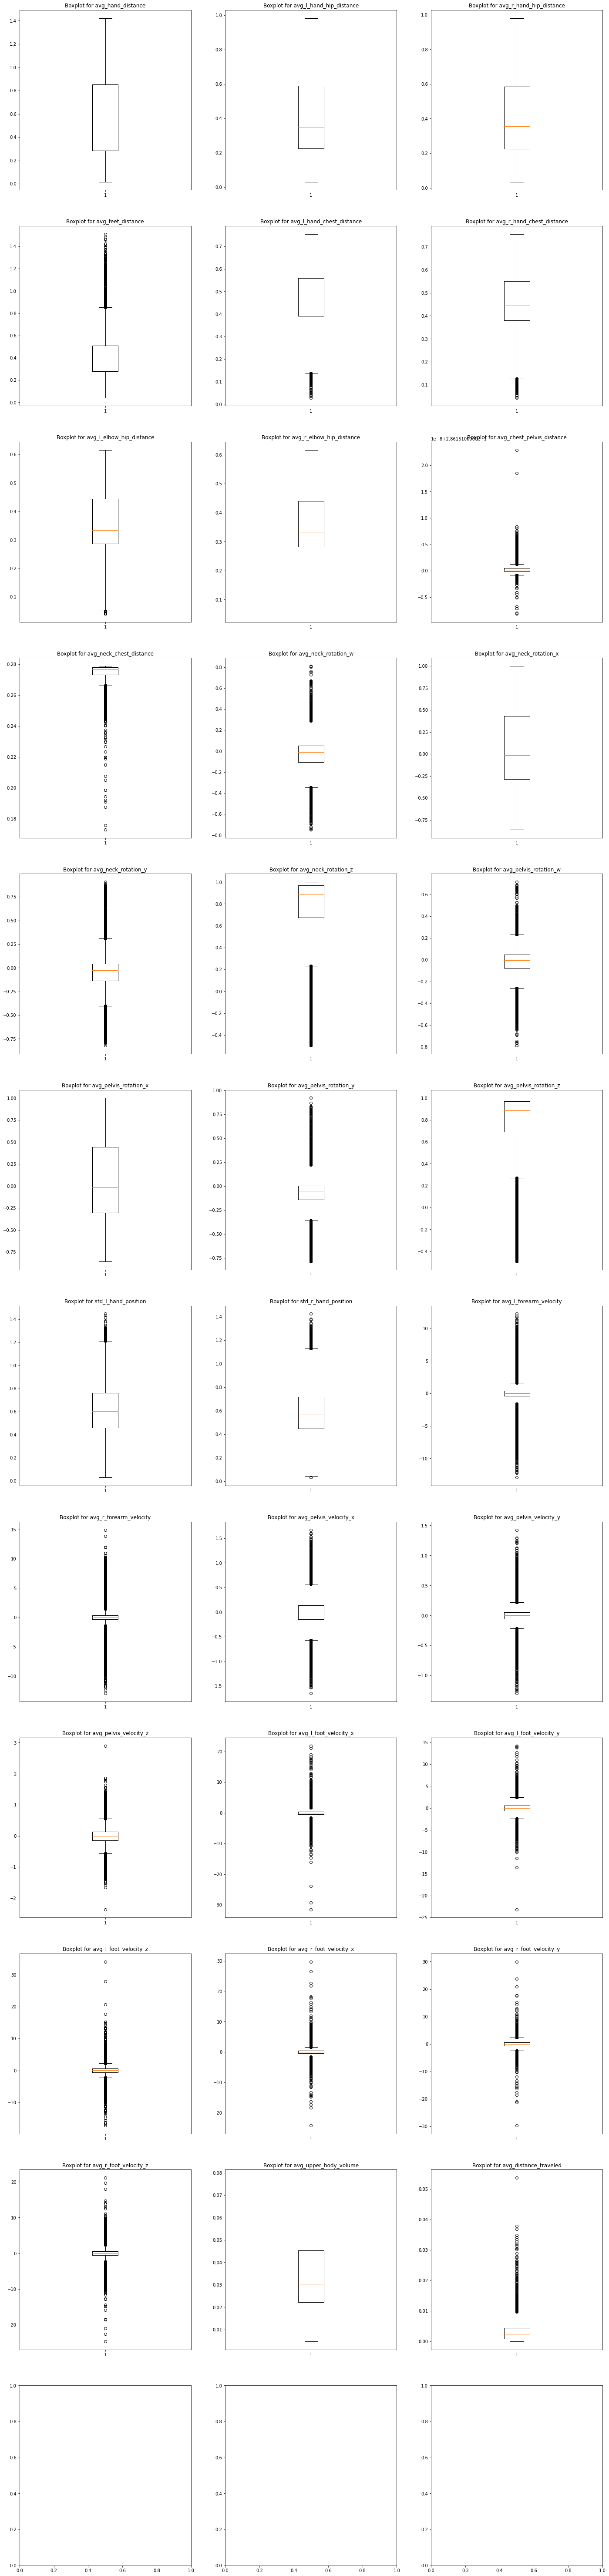

In [53]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)

numeric_vars = data.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [54]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
count,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,...,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000,20175.000000
mean,0.406512,0.403606,0.402057,0.248940,0.606984,0.585659,0.564207,0.547680,0.277561,0.962477,...,0.476707,0.449135,0.591357,0.619547,0.335742,0.449007,0.496890,0.538082,0.422074,0.055875
std,0.269230,0.243059,0.241260,0.124114,0.186902,0.190925,0.197473,0.197270,0.036011,0.047197,...,0.073779,0.066800,0.029629,0.041912,0.037015,0.027497,0.027068,0.042718,0.235523,0.052219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190548,0.203641,0.201305,0.162411,0.499436,0.473883,0.428337,0.410597,0.261316,0.947847,...,0.456506,0.421819,0.582968,0.602989,0.325059,0.441260,0.487049,0.525533,0.239749,0.016674
50%,0.318349,0.330985,0.339323,0.225378,0.574116,0.563070,0.509792,0.499736,0.263665,0.978019,...,0.476804,0.449650,0.590740,0.619514,0.335904,0.448810,0.497401,0.538365,0.352080,0.045213
75%,0.594217,0.586846,0.580785,0.318732,0.731890,0.711719,0.702028,0.688391,0.278069,0.993026,...,0.496560,0.474696,0.598716,0.635745,0.346992,0.456471,0.506499,0.551677,0.556172,0.082650
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


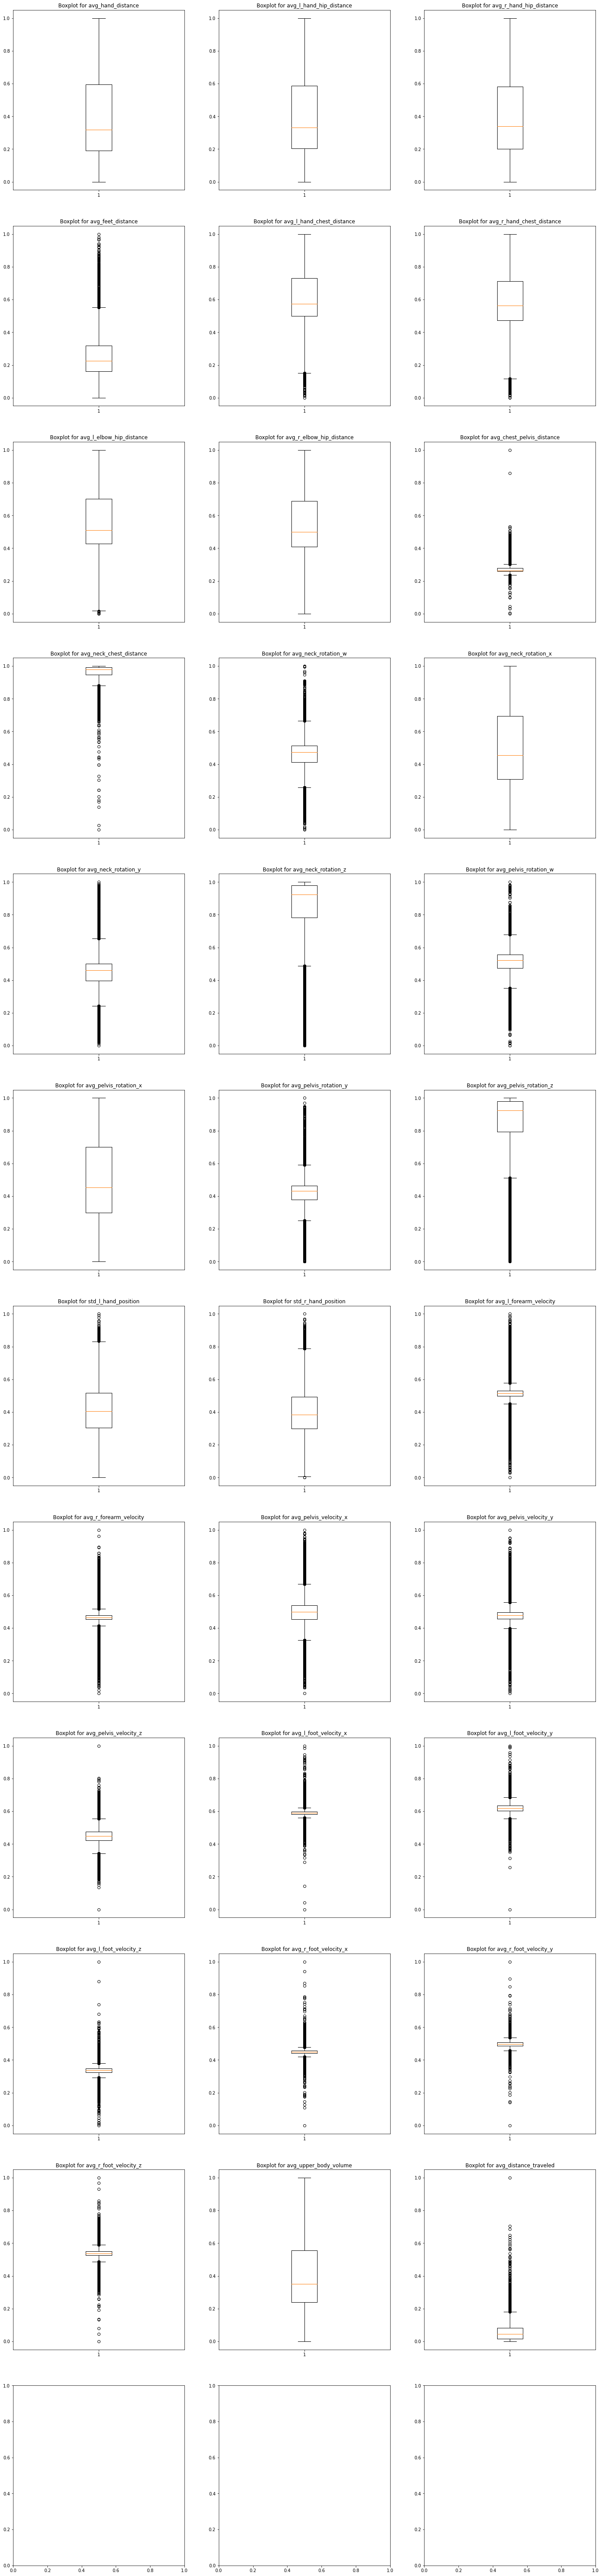

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.988621,0.758556,0.777470,0.227834,0.924631,0.931621,0.912027,0.920359,0.262792,0.996951,...,0.476812,0.449396,0.590841,0.619706,0.335797,0.448830,0.497462,0.538329,0.982666,0.000703
1,0.988220,0.758022,0.776198,0.228134,0.924481,0.930913,0.911643,0.919500,0.262826,0.997039,...,0.476841,0.450432,0.590710,0.619455,0.335751,0.448784,0.497425,0.538251,0.981634,0.000945
2,0.988587,0.757353,0.778526,0.228080,0.924085,0.932122,0.911223,0.921358,0.262866,0.997260,...,0.476715,0.450563,0.590819,0.620000,0.335905,0.448853,0.497603,0.538354,0.983064,0.001437
3,0.988206,0.755571,0.779917,0.228841,0.923227,0.932326,0.910089,0.921681,0.262849,0.997531,...,0.476731,0.450145,0.590845,0.619763,0.335741,0.448860,0.497484,0.538213,0.982519,0.001408
4,0.989566,0.755998,0.783723,0.228295,0.923545,0.934681,0.910652,0.924313,0.262952,0.997887,...,0.476810,0.449758,0.590766,0.619369,0.335707,0.448875,0.497253,0.537981,0.984512,0.001429


In [55]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [56]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
#minMaxDataFull.to_csv(r'datasets/pa/Fs_B_N_LMA_DATA.csv', index = False)
#minMaxDataFull.to_csv(r'datasets/pa/Fs_N_LMA_DATA.csv', index = False)
#minMaxDataFull.to_csv(r'datasets/pa/Fs_B2_N_LMA_DATA_EXTRA.csv', index = False)


#minMaxDataFull.to_csv(r'datasets/pa/Fs_N_LMA_DATA_EXTRA.csv', index = False)
#minMaxDataFull.to_csv(r'datasets/pa/Fs2_N_LMA_DATA_EXTRA.csv', index = False)

minMaxDataFull.to_csv(r'datasets/pa/Fs_N_DANCE_DATA.csv', index = False)

In [57]:
#data = pd.read_csv('datasets/pa/Fs_B_N_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_N_LMA_DATA_EXTRA.csv')
#data = pd.read_csv('datasets/pa/Fs_B2_N_LMA_DATA_EXTRA.csv')

#data = pd.read_csv('datasets/pa/Fs_N_LMA_DATA_EXTRA_NEUTRAL.csv')
#data = pd.read_csv('datasets/pa/Fs2_N_LMA_DATA_EXTRA.csv')

data = pd.read_csv('datasets/pa/Fs_N_DANCE_DATA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.988621,0.758556,0.777470,0.227834,0.924631,0.931621,0.912027,0.920359,0.262792,0.996951,...,0.590841,0.619706,0.335797,0.448830,0.497462,0.538329,0.982666,0.000703,-0.5,0.6
1,0.988220,0.758022,0.776198,0.228134,0.924481,0.930913,0.911643,0.919500,0.262826,0.997039,...,0.590710,0.619455,0.335751,0.448784,0.497425,0.538251,0.981634,0.000945,-0.5,0.6
2,0.988587,0.757353,0.778526,0.228080,0.924085,0.932122,0.911223,0.921358,0.262866,0.997260,...,0.590819,0.620000,0.335905,0.448853,0.497603,0.538354,0.983064,0.001437,-0.5,0.6
3,0.988206,0.755571,0.779917,0.228841,0.923227,0.932326,0.910089,0.921681,0.262849,0.997531,...,0.590845,0.619763,0.335741,0.448860,0.497484,0.538213,0.982519,0.001408,-0.5,0.6
4,0.989566,0.755998,0.783723,0.228295,0.923545,0.934681,0.910652,0.924313,0.262952,0.997887,...,0.590766,0.619369,0.335707,0.448875,0.497253,0.537981,0.984512,0.001429,-0.5,0.6
